In [1]:
import matplotlib.pyplot as plt
import numpy as np
import vectors

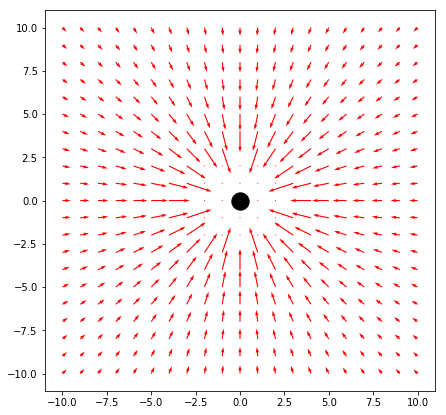

In [2]:
def g(x,y):
    d = vectors.length((x,y))
    if d > 3:
        return (-x/d**2,-y/d**2)
    else:
        return (0,0)

def plot_vector_field(f,xmin,xmax,ymin,ymax,xstep=1,ystep=1):

    X,Y = np.meshgrid(np.arange(xmin,xmax, xstep),np.arange(ymin,ymax, ystep))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color='red')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    
plt.scatter([0],[0],c='k',s=300)
    
plot_vector_field(g,-10,11,-10,11)
    
plt.savefig("vecfield.svg",transparent=True)

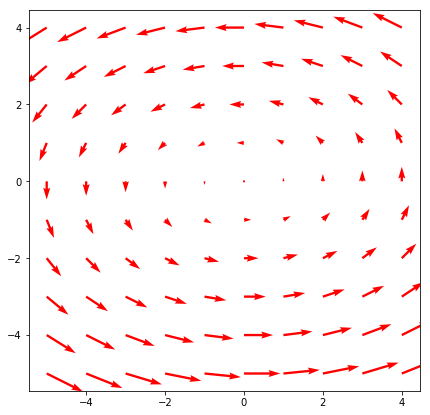

In [3]:
def f(x,y):
    return (-2*y, x)

plot_vector_field(f, -5,5,-5,5)

In [4]:
def gravitational_force(source_mass,target_mass,r):
    g = 6.67e-11
    magnitude = -(g * source_mass * target_mass)/(vectors.length(r))**2
    direction = vectors.unit(r)
    return vectors.scale(magnitude,direction)

In [5]:
gravitational_force(80,80,(1,0))

(-4.2687999999999997e-07, -0.0)

In [6]:
def gravitational_field(source_mass, r):
    return gravitational_force(source_mass, 1, r)

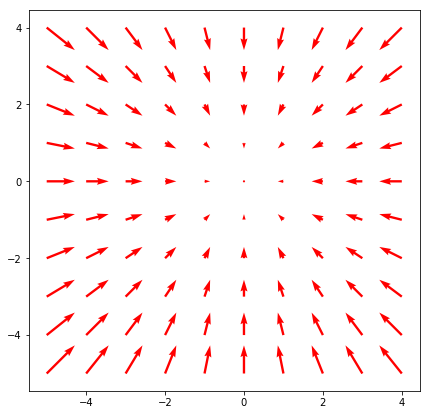

In [7]:
def f(x,y):
    return (-x,-y)

plot_vector_field(f,-5,5,-5,5)

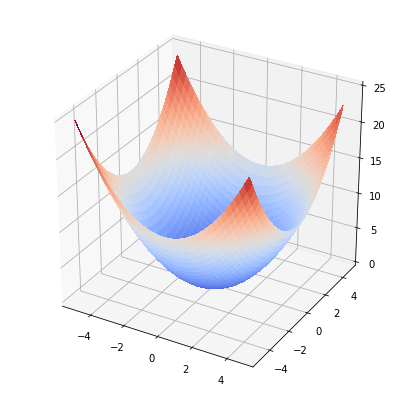

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xstep=0.25,ystep=0.25,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

#     # Customize the z axis.
#     ax.set_zlim(-1.01, 1.01)
#     ax.zaxis.set_major_locator(LinearLocator(10))
#     ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # # Add a color bar which maps values to colors.
    # fig.colorbar(surf, shrink=0.5, aspect=5)

def u(x,y):
    return 0.5 * (x**2 + y**2)
    
plot_scalar_field(u, -5, 5, -5, 5)
    

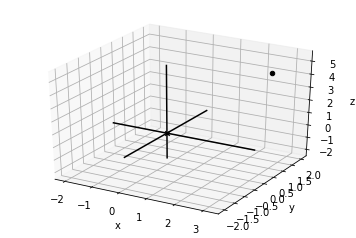

In [9]:
from draw3d import *
p = Points3D((3,1,5))
draw3d(p)

<Figure size 504x504 with 0 Axes>

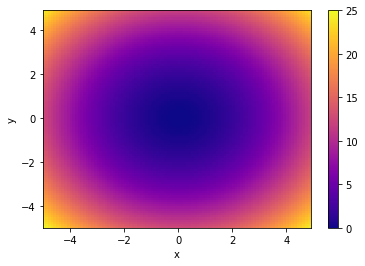

In [10]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xstep=0.1,ystep=0.1):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')

scalar_field_heatmap(u,-5,5,-5,5)

<Figure size 504x504 with 0 Axes>

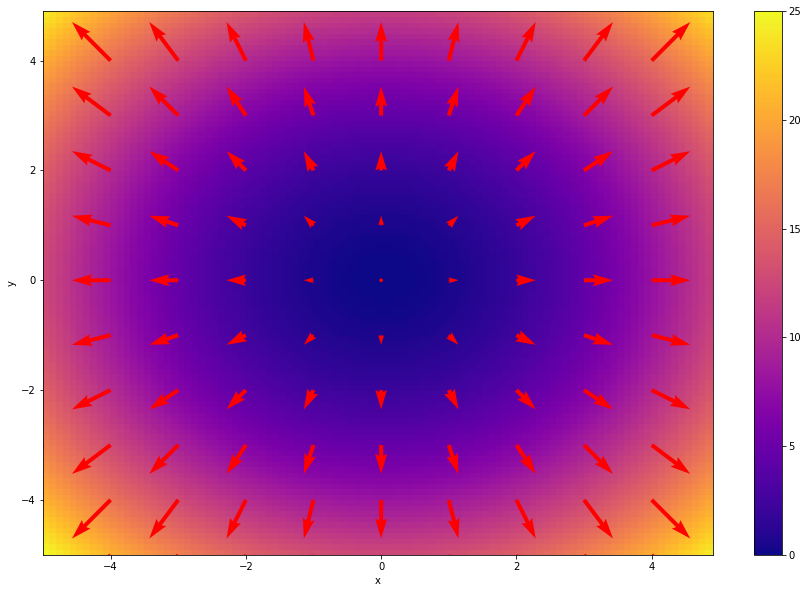

In [17]:
scalar_field_heatmap(u,-5,5,-5,5)
plot_vector_field(lambda x,y:(x,y),-5,5,-5,5)
plt.gcf().set_size_inches(15,10)

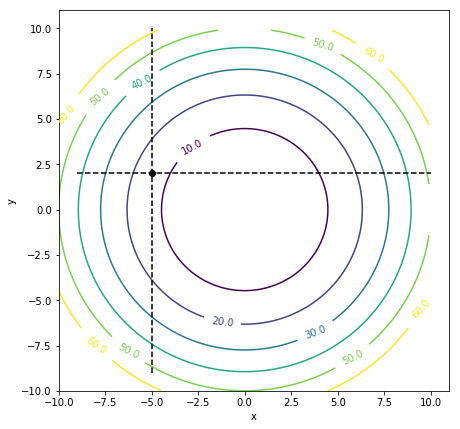

In [19]:
def scalar_field_contour(f,xmin,xmax,ymin,ymax,levels=None):

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, 0.1)
    Y = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    Z = fv(X,Y)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z,levels=levels)
    ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7,7)
    
scalar_field_contour(u,-10,10,-10,10,levels=[10,20,30,40,50,60])
plt.scatter([-5],[2],c='k')
plt.plot([-9,10],[2,2],c='k',linestyle='dashed')
plt.plot([-5,-5],[-9,10],c='k',linestyle='dashed')

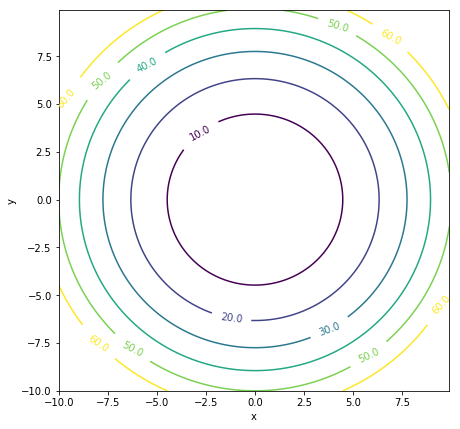

In [20]:
scalar_field_contour(u,-10,10,-10,10,levels=[10,20,30,40,50,60])

In [184]:
import asteroids

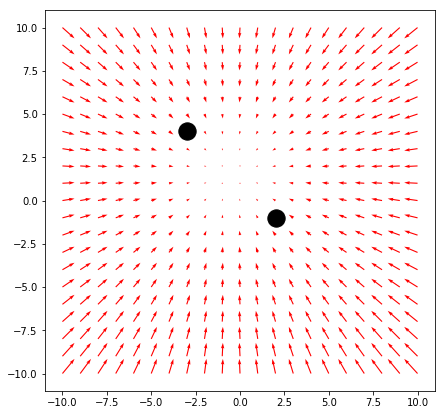

In [13]:
from asteroids import *

def two_blackhole_field(x,y):
    return asteroids.gravitational_field(black_holes,x,y)

plot_vector_field(two_blackhole_field,-10,10,-10,10)


plt.scatter([bh.x for bh in black_holes],[bh.y for bh in black_holes],c='k',s=300)

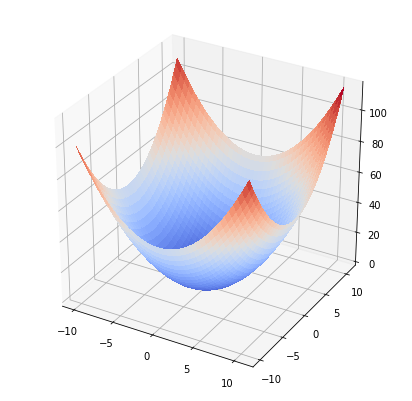

In [15]:


plot_scalar_field(u,-10,10,-10,10)
fig = plt.gcf()
ax = plt.gca(projection='3d')
ax.plot_surface([-5,-5],[0,10],np.array([[0,0],[10,10]]), rcount=1, ccount=1, color='b', alpha=0.3, edgecolor='none')


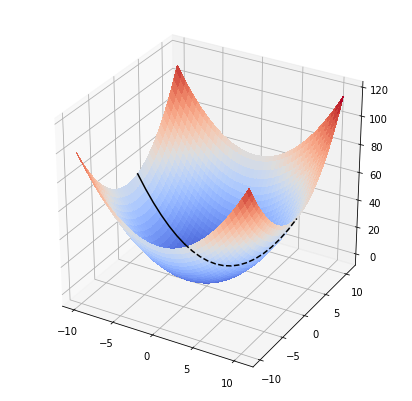

In [31]:
def plot_3d_cross_section(f,x0,y0,xmin,xmax,ymin,ymax,xstep=0.25,ystep=0.25):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.arange(xmin, xmax+1, 0.25)
    Y = np.arange(ymin, ymax+1, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    #Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    
#     X = np.array([-5 for i in range(-10,11)][:12])
#     Y = np.array(list(np.arange(ymin, ymax+1, 1))[:12])
#     ax.plot(X,Y,fv(X,Y),c='k',linestyle='dashed')
    
#     X = np.array([-5 for i in range(-10,11)][11:])
#     Y = np.array(list(np.arange(ymin, ymax+1, 1))[11:])
#     ax.plot(X,Y,fv(X,Y),c='k',linestyle='solid')
    
    Y = np.array([2 for i in range(-10,11)][:7])
    X = np.array(list(np.arange(xmin, xmax+1, 1))[:7])
    ax.plot(X,Y,fv(X,Y),c='k')
    
    Y = np.array([2 for i in range(-10,11)][6:])
    X = np.array(list(np.arange(xmin, xmax+1, 1))[6:])
    ax.plot(X,Y,fv(X,Y),c='k',linestyle='dashed')
    
#     ax.plot_surface([-5,-5],[-10,10],np.array([[0,0],[100,100]]), rcount=100, ccount=100, color='b', alpha=0.3, edgecolor='none')
#     ax.plot_surface([-10,10],[2,2],np.array([[0,0],[100,100]]), rcount=100, ccount=100, color='b', alpha=0.3, edgecolor='none')

    ax.scatter([-5],[2],[u(-5,2)],c='k',s=4)
plot_3d_cross_section(u,-5,2,-10,10,-10,10)

Text(0,0.5,'z')

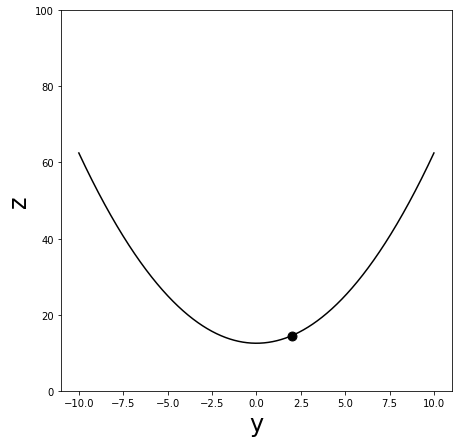

In [17]:
def plot_function(f,xmin,xmax,color=None):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],c=color)
plot_function(lambda y: u(-5,y),-10,10,color='k')
plt.scatter([2],[14.5],c='k',s=80)
plt.ylim(0,100)
plt.gcf().set_size_inches(7,7)
plt.xlabel('y',fontsize=24)
plt.ylabel('z',fontsize=24)


Text(0,0.5,'z')

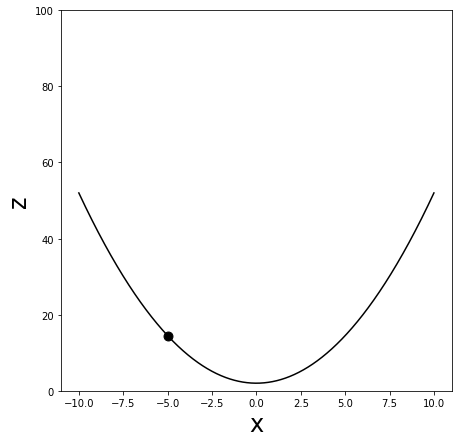

In [18]:
def plot_function(f,xmin,xmax,color=None):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],c=color)
plot_function(lambda x: u(x,2),-10,10,color='k')
plt.scatter([-5],[14.5],c='k',s=80)
plt.ylim(0,100)
plt.gcf().set_size_inches(7,7)
plt.xlabel('x',fontsize=24)
plt.ylabel('z',fontsize=24)


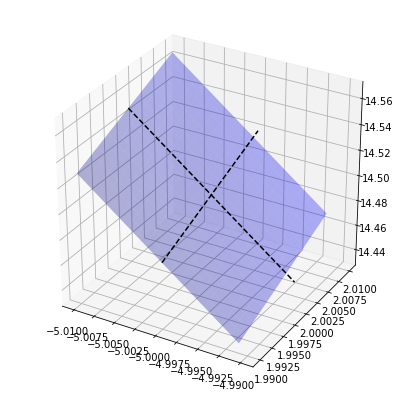

In [74]:
plot_scalar_field(u,-5.01,-4.99,1.99,2.01,xstep=0.001,ystep=0.001,c='b',cmap=None,alpha=0.3,antialiased=True)
plt.scatter([-5],[2],[u(-5,2)])
plt.gca().set_zlim(u(-4.99,1.99), u(-5.01,2.01))

plt.plot(np.linspace(-5.01,-4.99,2),[2,2],[u(x,2) for x in np.linspace(-5.01,-4.99,2)],c='k',linestyle='dashed')
plt.plot([-5,-5],np.linspace(1.99,2.01,2),[u(-5,y) for y in np.linspace(1.99,2.01,2)],c='k',linestyle='dashed')
plt.scatter([-5],[2],[14.5],c='k')

In [64]:
np.linspace(-5.01,-4.99,2)

array([-5.01, -4.99])

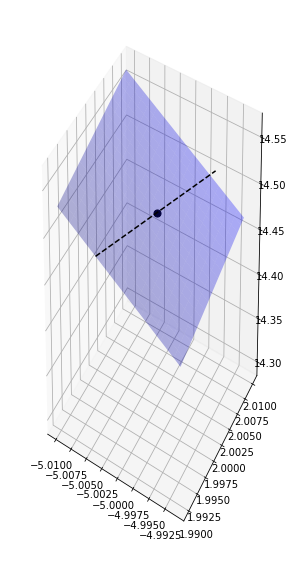

In [98]:
plot_scalar_field(u,-5.01,-4.99,1.99,2.01,xstep=0.001,ystep=0.001,c='b',cmap=None,alpha=0.3,antialiased=True)
# plt.scatter([-5],[2],[u(-5,2)])
plt.gca().set_zlim(u(-4.99,1.99) + (u(-4.99,1.99) - u(-5.01,2.01)), u(-5.01,2.01))

X = np.linspace(-5.004,-4.996,5)
Y = np.linspace(1.99, 2.01, 5)
Z = u(X,Y)
plt.plot(X,Y,Z,c='k',linestyle='dashed')

plt.gcf().set_size_inches(5,10)
plt.gca().scatter([-5],[2],[14.5],c='k',s=50)

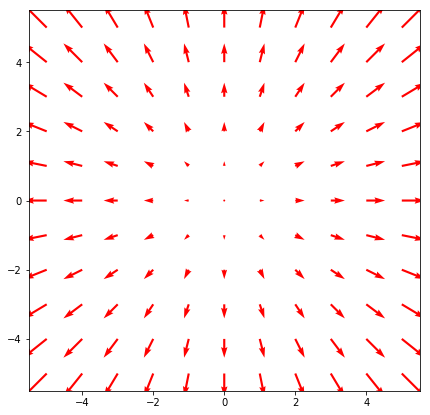

In [100]:
plot_vector_field(lambda x,y: (x,y),-5,5,-5,5)

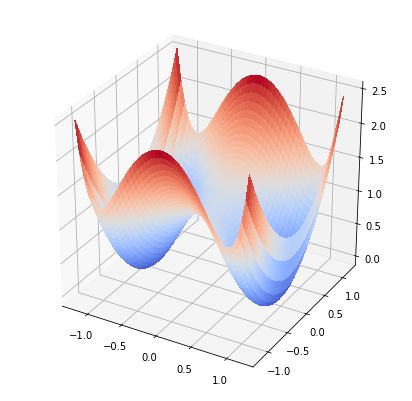

In [204]:
def v(x,y):
    return 1 + y**2 - 2*x**2 + x**6

plot_scalar_field(v,-1.2,1.2,-1.2,1.2,xstep=0.01, ystep=0.01)

<Figure size 504x504 with 0 Axes>

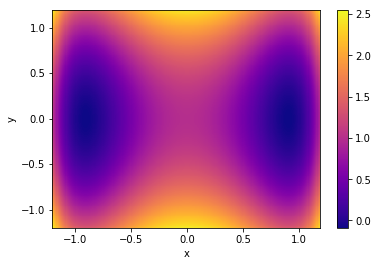

In [205]:
scalar_field_heatmap(v,-1.2,1.2,-1.2,1.2,xstep=0.01,ystep=0.01)

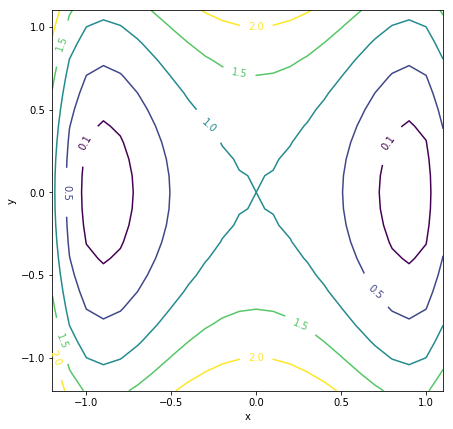

In [206]:
scalar_field_contour(v,-1.2,1.2,-1.2,1.2, levels=[0.1,0.5,1,1.5,2])

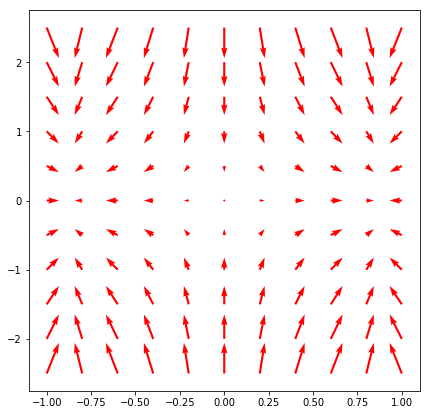

In [225]:
plot_vector_field(lambda x,y: (4*x - 6*x**5, -2*y), -1,1.2,-2.5,3,xstep=0.2,ystep=0.5)
plt.scatter([])

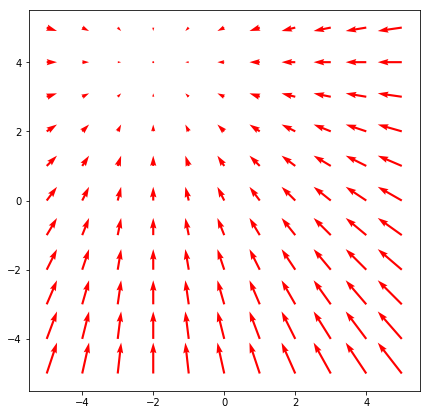

In [227]:
plot_vector_field(lambda x,y: (-2-x,4-y), -5,6,-5,6)

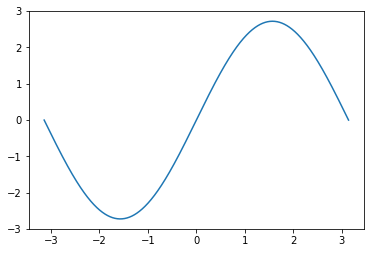

In [235]:
import math
plot_function(lambda x: math.e*sin(x),-pi,pi)

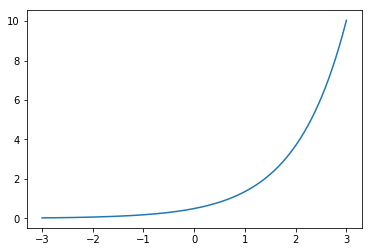

In [237]:
import math
plot_function(lambda y: math.exp(y)/2,-3,3)